<a href="https://colab.research.google.com/github/Arjun-R-krishnan/DSML-Machine-Learning/blob/main/Data_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Imorting Necessary Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading Dataset

In [ ]:
df=pd.read_csv('Employee.csv')

## Performimg Basic EDA

In [ ]:
df.head()

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0


In [ ]:
df.info()                                                               #checking summary of the DataFrame.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Company  140 non-null    object 
 1   Age      130 non-null    float64
 2   Salary   124 non-null    float64
 3   Place    134 non-null    object 
 4   Country  148 non-null    object 
 5   Gender   148 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 7.1+ KB


## Checking unique values in each column and finding the number of unique values

In [ ]:
def unique_values(df):                                       # defining function for finding unique values in a column
    for col in df.columns:
        unique_val = df[col].unique()
        length_of_uinque_values = len( unique_val)
        print(f"unique values in column {col} :\n {unique_val} \n {col} consists of { length_of_uinque_values} unique values")

In [ ]:
unique_values(df)

unique values in column Company :
 ['TCS' 'Infosys' 'CTS' nan 'Tata Consultancy Services' 'Congnizant'
 'Infosys Pvt Lmt'] 
 Company consists of 7 unique values
unique values in column Age :
 [20. 30. 35. 40. 23. nan 34. 45. 18. 22. 32. 37. 50. 21. 46. 36. 26. 41.
 24. 25. 43. 19. 38. 51. 31. 44. 33. 17.  0. 54.] 
 Age consists of 30 unique values
unique values in column Salary :
 [  nan 2300. 3000. 4000. 5000. 6000. 7000. 8000. 9000. 1089. 1234. 3030.
 3045. 3184. 4824. 5835. 7084. 8943. 8345. 9284. 9876. 2034. 7654. 2934.
 4034. 5034. 8202. 9024. 4345. 6544. 6543. 3234. 4324. 5435. 5555. 8787.
 3454. 5654. 5009. 5098. 3033.] 
 Salary consists of 41 unique values
unique values in column Place :
 ['Chennai' 'Mumbai' 'Calcutta' 'Delhi' 'Podicherry' 'Cochin' nan 'Noida'
 'Hyderabad' 'Bhopal' 'Nagpur' 'Pune'] 
 Place consists of 12 unique values
unique values in column Country :
 ['India'] 
 Country consists of 1 unique values
unique values in column Gender :
 [0 1] 
 Gender consists of 2

## Renaming of columns

In [ ]:
df.rename(columns={'Age':'Employee Age','Salary':'Employee Salary'} ,inplace =True)    # renamed Age and Salary coulmns

In [ ]:
df['Company'] = df['Company'].replace('Tata Consultancy Services','TCS')               # renaming Tata Consultancy Services to TCS
df['Company'] = df['Company'].replace('Infosys Pvt Lmt','Infosys')                     # renamingInfosys Pvt Lmt','Infosys
df['Company'] = df['Company'].replace('Congnizant','CTS')                                          # renaming Congnizant to CTS

In [ ]:
unique_values(df)                                              # checking unique values afer changing names

unique values in column Company :
 ['TCS' 'Infosys' 'CTS' nan] 
 Company consists of 4 unique values
unique values in column Employee Age :
 [20. 30. 35. 40. 23. nan 34. 45. 18. 22. 32. 37. 50. 21. 46. 36. 26. 41.
 24. 25. 43. 19. 38. 51. 31. 44. 33. 17.  0. 54.] 
 Employee Age consists of 30 unique values
unique values in column Employee Salary :
 [  nan 2300. 3000. 4000. 5000. 6000. 7000. 8000. 9000. 1089. 1234. 3030.
 3045. 3184. 4824. 5835. 7084. 8943. 8345. 9284. 9876. 2034. 7654. 2934.
 4034. 5034. 8202. 9024. 4345. 6544. 6543. 3234. 4324. 5435. 5555. 8787.
 3454. 5654. 5009. 5098. 3033.] 
 Employee Salary consists of 41 unique values
unique values in column Place :
 ['Chennai' 'Mumbai' 'Calcutta' 'Delhi' 'Podicherry' 'Cochin' nan 'Noida'
 'Hyderabad' 'Bhopal' 'Nagpur' 'Pune'] 
 Place consists of 12 unique values
unique values in column Country :
 ['India'] 
 Country consists of 1 unique values
unique values in column Gender :
 [0 1] 
 Gender consists of 2 unique values


## Data Cleaning
Find the missing and inappropriate values, treat them appropriately.

Remove all duplicate rows.

Find the outliers
.
Replace the value 0 in age as N
aN
Treat the null values in all columns using any measures(removing/ replace the values with mean/median/mode)

In [ ]:
df.isnull().sum()                                         # checking null values

Company             8
Employee Age       18
Employee Salary    24
Place              14
Country             0
Gender              0
dtype: int64

In [ ]:
df['Company'] = df['Company'].fillna('Unknown')           # changing the NaN values to Unknown
df['Place'] = df['Place'].fillna('Unknown')

In [ ]:
df.drop_duplicates(inplace = True)                        # Removing duplicate values

In [ ]:
df['Employee Age'].replace(0,np.nan,inplace = True)       # Replacing  0 in Emloyee Age as Nan

In [ ]:
def replace_with_median(df,col):                          # Defining function for replacing null values with median
    df[col].fillna(df[col].median(),inplace = True)
    return df

In [ ]:
replace_with_median(df,'Employee Age')                     # Replacing null values in Employee Age column using function

,Company,Employee Age,Employee Salary,Place,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0
...,...,...,...,...,...,...
142,Infosys,22.0,8202.0,Mumbai,India,0
143,TCS,33.0,9024.0,Calcutta,India,1
145,Infosys,44.0,4034.0,Delhi,India,1
146,TCS,33.0,5034.0,Mumbai,India,1


In [ ]:
replace_with_median(df,'Employee Salary')                       # Replacing null values in Employee Age column using function

,Company,Employee Age,Employee Salary,Place,Country,Gender
0,TCS,20.0,5000.0,Chennai,India,0
1,Infosys,30.0,5000.0,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0
...,...,...,...,...,...,...
142,Infosys,22.0,8202.0,Mumbai,India,0
143,TCS,33.0,9024.0,Calcutta,India,1
145,Infosys,44.0,4034.0,Delhi,India,1
146,TCS,33.0,5034.0,Mumbai,India,1


In [ ]:
df = df.reset_index(drop=True)                                 # Resetting index

In [ ]:
df.isnull().sum()                                             # Checking the count of null values in the dataset

Company            0
Employee Age       0
Employee Salary    0
Place              0
Country            0
Gender             0
dtype: int64

In [ ]:
df = df[~(df == 'Unknown').any(axis=1)]                        # Drop rows that contain the value "unknown"

In [ ]:
unique_values(df)                                              # checking unique values after removing Unknown from Company and Place

unique values in column Company :
 ['TCS' 'Infosys' 'CTS'] 
 Company consists of 3 unique values
unique values in column Employee Age :
 [20. 30. 35. 40. 23. 33. 34. 45. 18. 22. 32. 37. 50. 21. 46. 41. 24. 43.
 19. 38. 51. 31. 44. 26. 17. 36. 54.] 
 Employee Age consists of 27 unique values
unique values in column Employee Salary :
 [5000. 2300. 3000. 4000. 6000. 7000. 8000. 9000. 1089. 1234. 3030. 3045.
 3184. 4824. 5835. 7084. 8943. 8345. 9284. 9876. 2034. 7654. 2934. 4034.
 4345. 6544. 5034. 8202. 9024. 3234. 4324. 5435. 5555. 8787. 5098. 3033.] 
 Employee Salary consists of 36 unique values
unique values in column Place :
 ['Chennai' 'Mumbai' 'Calcutta' 'Delhi' 'Podicherry' 'Cochin' 'Noida'
 'Hyderabad' 'Bhopal' 'Nagpur' 'Pune'] 
 Place consists of 11 unique values
unique values in column Country :
 ['India'] 
 Country consists of 1 unique values
unique values in column Gender :
 [0 1] 
 Gender consists of 2 unique values


## Finding OutLiers

In [ ]:
def find_outliers(df,col):                                              # defining function to find outlier using IQR method
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR  = Q3 - Q1
    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5* IQR)
    outliers = df[(df[col]<lower_bound) | (df[col] > upper_bound)]
    return outliers

In [ ]:
float_cols =  df.select_dtypes(include=['float64']).columns             # selecting numerical columns for finding outliers

In [ ]:
for col in float_cols:                                                   # checking ouliers using for loop
    df=df
    Outliers=find_outliers(df,col)
    print(f"outliers in {col}:\n {Outliers}")


outliers in Employee Age:
 Empty DataFrame
Columns: [Company, Employee Age, Employee Salary, Place, Country, Gender]
Index: []
outliers in Employee Salary:
 Empty DataFrame
Columns: [Company, Employee Age, Employee Salary, Place, Country, Gender]
Index: []


## Checking outliers using boxplot

<Axes: >

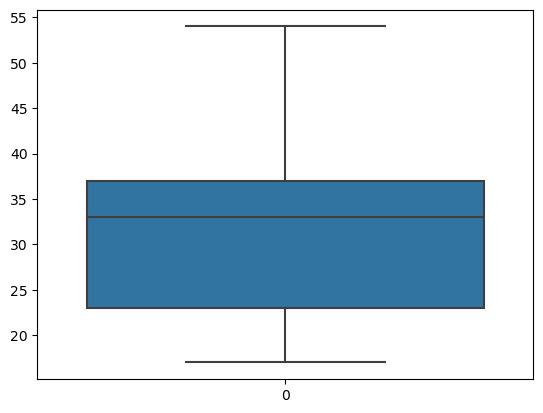

In [ ]:
sns.boxplot(df['Employee Age'])

<Axes: >

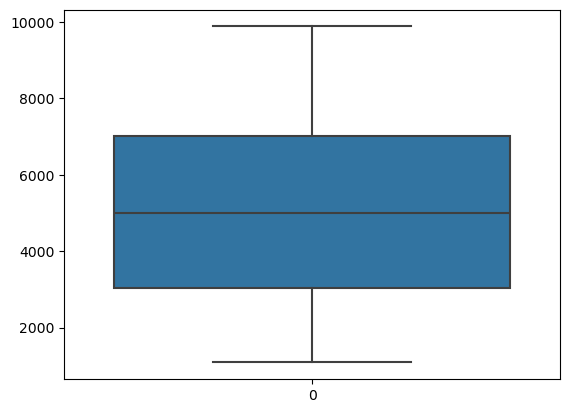

In [ ]:
sns.boxplot(df['Employee Salary'])

## Data Analysis

Filter the data with age >40 and salary<5000

Plot the chart with age and salary


Count the number of people from each place and represent it visually

In [ ]:
new_df =df[(df['Employee Age']>40) & (df['Employee Salary']<5000)]       # Filtering the data with Employee Age above 40 and salary

In [ ]:
new_df

,Company,Employee Age,Employee Salary,Place,Country,Gender
21,Infosys,50.0,3184.0,Delhi,India,0
32,Infosys,45.0,4034.0,Calcutta,India,0
39,Infosys,41.0,3000.0,Mumbai,India,0
50,Infosys,41.0,3000.0,Chennai,India,0
57,Infosys,51.0,3184.0,Hyderabad,India,0
68,Infosys,43.0,4034.0,Mumbai,India,0
75,Infosys,44.0,3000.0,Cochin,India,0
85,Infosys,41.0,3000.0,Delhi,India,0
92,Infosys,54.0,3184.0,Mumbai,India,0
103,Infosys,44.0,4034.0,Delhi,India,0


Text(0, 0.5, 'Salary')

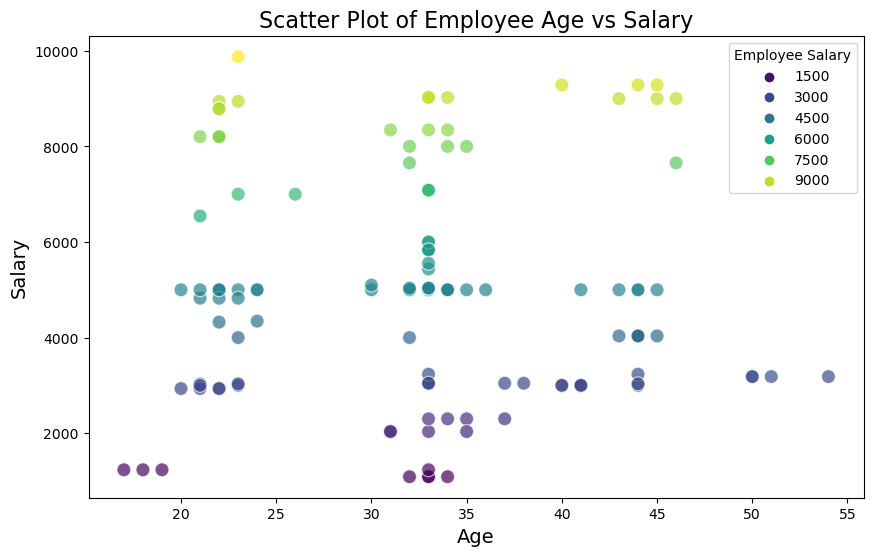

In [ ]:
plt.figure(figsize=(10, 6))  # Set the figure size for better visibility
sns.scatterplot(data=df, x='Employee Age', y='Employee Salary', hue='Employee Salary', palette='viridis', s=100, alpha=0.7)

# Add title and labels
plt.title('Scatter Plot of Employee Age vs Salary', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Salary', fontsize=14)

Text(0, 0.5, 'Salary')

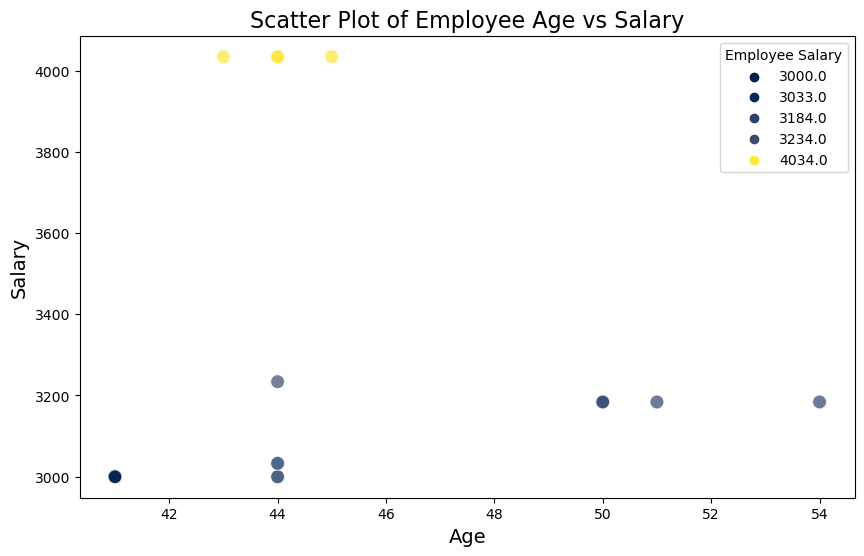

In [ ]:
#Plottting scatter plot of filtered data
plt.figure(figsize=(10, 6))  # Set the figure size for better visibility
sns.scatterplot(data=new_df, x='Employee Age', y='Employee Salary', hue='Employee Salary', palette='cividis', s=100, alpha=0.7)

# Add title and labels
plt.title('Scatter Plot of Employee Age vs Salary', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Salary', fontsize=14)

In [ ]:
place_counts = df.groupby('Place').size().sort_values(ascending=False)

In [ ]:
place_counts

Place
Mumbai        33
Calcutta      30
Chennai       13
Cochin        13
Delhi         13
Hyderabad      7
Noida          7
Podicherry     3
Pune           2
Bhopal         1
Nagpur         1
dtype: int64

In [ ]:
place_count_of_newdf= new_df.groupby('Place').size().sort_values(ascending=False)

In [ ]:
place_count_of_newdf

Place
Delhi        4
Mumbai       4
Calcutta     2
Cochin       2
Hyderabad    2
Chennai      1
dtype: int64

<Axes: xlabel='Place'>

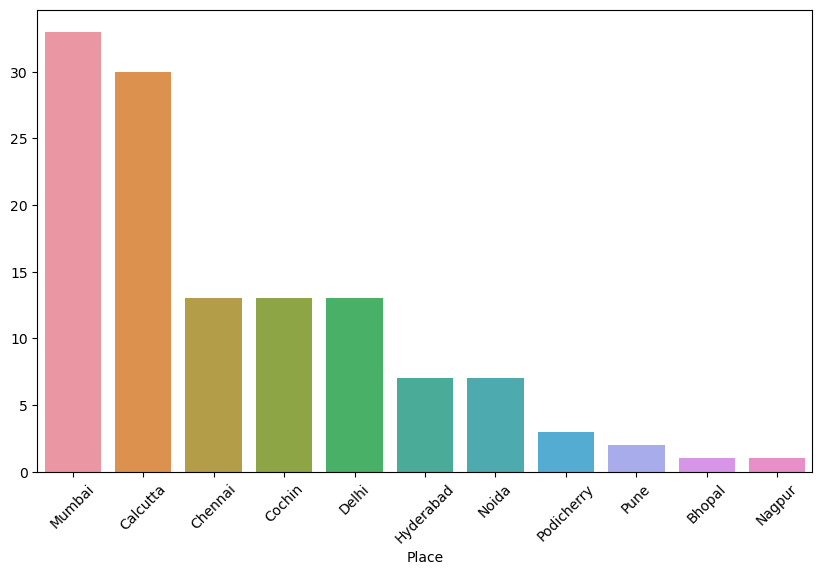

In [ ]:
plt.figure(figsize=(10, 6))
plt.xticks(rotation=45)
sns.barplot(x=place_counts.index,y=place_counts.values)

<Axes: xlabel='Place'>

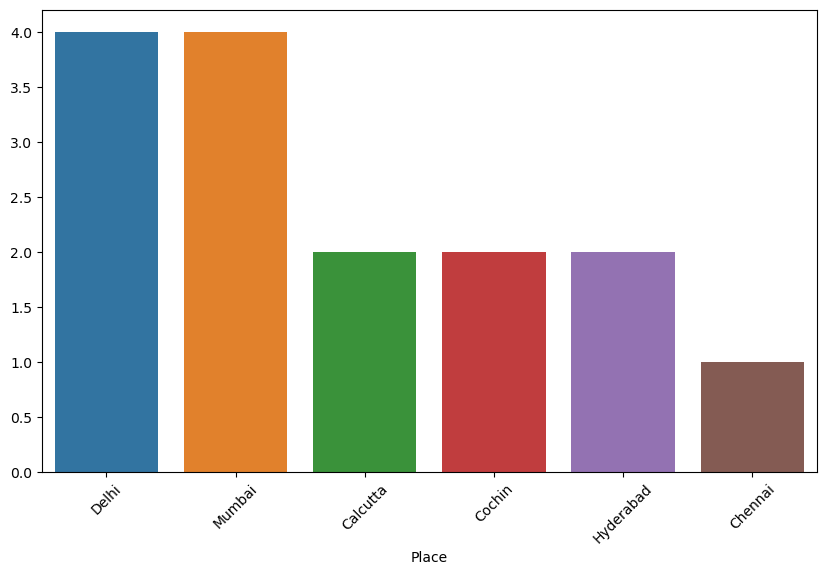

In [ ]:
plt.figure(figsize=(10, 6))
plt.xticks(rotation=45)
sns.barplot(x=place_count_of_newdf.index,y=place_count_of_newdf.values)

## Encoding

Convert categorical variables into numerical representations using techniques such as one-hot encoding, label encoding, making them suitable for analysis by machine learning algorithms.


In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder              #Imorting Necessary Libraries

Encoding categorical columns uing the technique One Hot Encoding

In [ ]:
one_hot_encoder=OneHotEncoder(sparse_output=False)                          #Initializing encoder funcion

In [ ]:
cat_cols =  df.select_dtypes(include=['object']).columns                     #Sekecting categorical columns to encode

In [ ]:
oh_encoded_data = one_hot_encoder.fit_transform(df[cat_cols])                #Encoding the categorical columns

In [ ]:
oh_encoded_df = pd.DataFrame(oh_encoded_data,columns=one_hot_encoder.get_feature_names_out(cat_cols))     #Creatinf new dataframe

In [ ]:
oh_encoded_df = pd.concat([df[['Employee Age','Employee Salary','Country','Gender']],oh_encoded_df],axis =1)

In [ ]:
oh_encoded_df.head()

,Employee Age,Employee Salary,Country,Gender,Company_CTS,Company_Infosys,Company_TCS,Place_Bhopal,Place_Calcutta,Place_Chennai,Place_Cochin,Place_Delhi,Place_Hyderabad,Place_Mumbai,Place_Nagpur,Place_Noida,Place_Podicherry,Place_Pune,Country_India
0,20.0,5000.0,India,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,30.0,5000.0,India,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,35.0,2300.0,India,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,40.0,3000.0,India,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,23.0,4000.0,India,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


## Label Encoding

In [ ]:
lb_encoder = LabelEncoder()                                               #Initializing encoder funcion

In [ ]:
lb_encoded_df = df.copy()                                                 #Creating a copy of the main df

In [ ]:
cat_cols                                                                  # Selecting categorical columns for encoding

Index(['Company', 'Place', 'Country'], dtype='object')

In [ ]:
for col in cat_cols:                                                              #Using for loop encoding all categorical columns in the new dataframe
    lb_encoded_df[col +' encoded']=lb_encoder.fit_transform(lb_encoded_df[col])
    lb_encoded_df = lb_encoded_df.drop(col,axis=1)

In [ ]:
lb_encoded_df.head()

,Employee Age,Employee Salary,Gender,Company encoded,Place encoded,Country encoded
0,20.0,5000.0,0,2,2,0
1,30.0,5000.0,0,1,6,0
2,35.0,2300.0,0,2,1,0
3,40.0,3000.0,0,1,4,0
4,23.0,4000.0,0,2,6,0


## Scaling of the features uing standardscaler and minmaxscaler

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler                    #Importing the necessary libraries

## Standard scaling of the label encoded df

In [ ]:
std_scaler=StandardScaler()                                                       #Initializing the scaling function

<class 'pandas.core.frame.DataFrame'>
Index: 123 entries, 0 to 143
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Employee Age     123 non-null    float64
 1   Employee Salary  123 non-null    float64
 2   Gender           123 non-null    int64  
 3   Company encoded  123 non-null    int32  
 4   Place encoded    123 non-null    int32  
 5   Country encoded  123 non-null    int32  
dtypes: float64(2), int32(3), int64(1)
memory usage: 9.4 KB


In [ ]:
cols_to_scal = lb_encoded_df.select_dtypes(include=['float64']).columns                     #Selecting columns to scale

In [ ]:
lb_encoded_df[['Employee Age','Employee Salary']]=std_scaler.fit_transform(lb_encoded_df[['Employee Age','Employee Salary']])     #tranforming the data

In [ ]:
lb_encoded_df.head()

,Employee Age,Employee Salary,Gender,Company encoded,Place encoded,Country encoded
0,-1.467635,-0.004180,0,2,2,0
1,-0.287000,-0.004180,0,1,6,0
2,0.303318,-1.158958,0,2,1,0
3,0.893635,-0.859571,0,1,4,0
4,-1.113445,-0.431875,0,2,6,0


## Minmax scaling of one hot encoded data

In [ ]:
m_mscalar= MinMaxScaler()                                                          #Initializing the scaling function

In [ ]:
oh_encoded_df[['Employee Age','Employee Salary']] = m_mscalar.fit_transform(oh_encoded_df[['Employee Age','Employee Salary']])        #scaling the

In [ ]:
oh_encoded_df.head()

,Employee Age,Employee Salary,Country,Gender,Company_CTS,Company_Infosys,Company_TCS,Place_Bhopal,Place_Calcutta,Place_Chennai,Place_Cochin,Place_Delhi,Place_Hyderabad,Place_Mumbai,Place_Nagpur,Place_Noida,Place_Podicherry,Place_Pune,Country_India
0,0.081081,0.445089,India,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.351351,0.445089,India,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.486486,0.137817,India,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.621622,0.217480,India,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.162162,0.331285,India,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
